# Bondad de Ajuste

## 1. Ejemplo Dado balanceado correctamente
+ Se tienen los resultados de lanzar un dado y se quiere verificar si el dado es justo 
    + (es decir, si las probabilidades de obtener cualquier número del 1 al 6 son iguales). Una prueba de bondad de ajuste (como Chi-cuadrado) 
    + permite comparar las frecuencias observadas de cada número con las frecuencias esperadas bajo la hipótesis de un dado justo. 
+ En este ejemplo las frecuencias observadas y eséradas al lanzar un dado 60 veces son:
    + Observado=[8,12,10,15,9,6]
    + Esperado=[10,10,10,10,10,10]

In [1]:
import scipy.stats as stats

# Frecuencias observadas (resultados de lanzar un dado 60 veces)
observed = [8, 12, 10, 15, 9, 6]

# Frecuencias esperadas (si el dado es justo)
expected = [10, 10, 10, 10, 10, 10]

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: el dado parece ser justo.")
else:
    print("Se rechaza la hipótesis nula: el dado no es justo.")


Estadístico Chi-cuadrado: 5.0000
Valor p: 0.4159
No se rechaza la hipótesis nula: el dado parece ser justo.


____________________________________________________________________________________________________________________________________________

## 2. Ejemplo de los pesos de las personas del Natiional Health Examination Surveay.
+ El que el National Health Examination Survey, desea comprobar si en su investigación la gente dió su peso exacto o simplemente lo redondeó.
    + Los últimos dígitos de los 80 valores observados tienen la siguiente distribución:
        + observed=[35,0,2,1,4,24,1,4,7,2]
+ Cuando analizamos los valores esperados para los ultimos dígitos, vemos que estos (si son declarados con exactitud) se distribuyen uniformemente 
    + entre todos los digitos del 0 al 9. Entonces como las muestras son 80, la frecuencia de cada dígito debería ser 8.
        + esperado=[8,8,8,8,8,8,8,8,8,8]
+ Para este ejemplo entonces:
    + La hipótesis nula debe contener la condición de igualdad, así que tenemos:
        + H0:  p0 = p1 = p2 = p3 = p4 = p5 = p6 = p7 = p8 =  p9
        + H1:  Al menos una de las probabilidades es diferente de las otras.

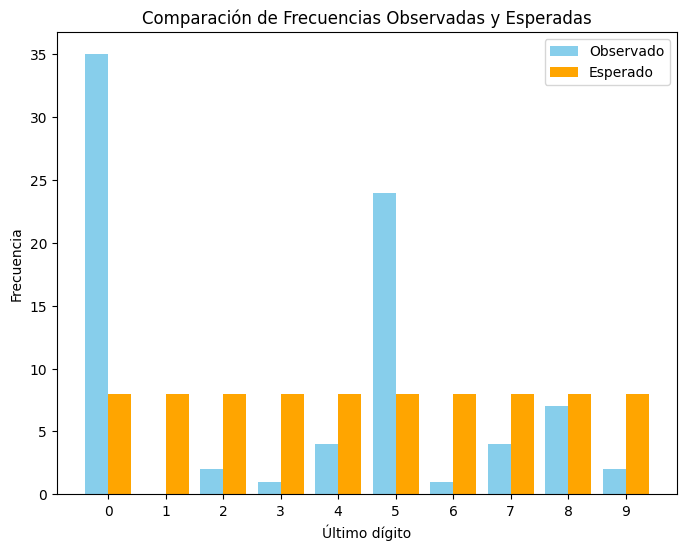

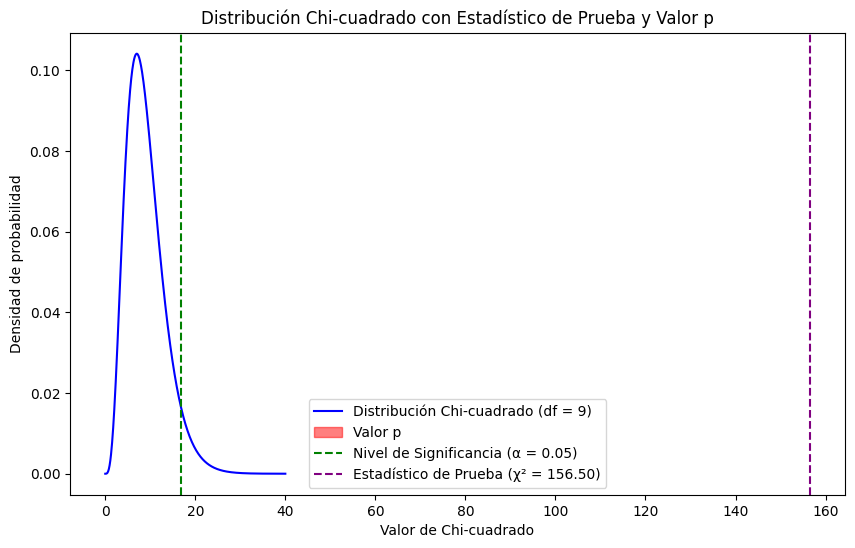

Estadístico Chi-cuadrado: 156.5000
Valor p: 0.0000
Valor crítico para α = 0.05: 16.9190
Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Nuevas frecuencias observadas
observed = np.array([35, 0, 2, 1, 4, 24, 1, 4, 7, 2])

# Frecuencias esperadas para una distribución uniforme
expected = np.full(10, 8)  # 80 muestras, así que 8 por dígito

# Realizar la prueba de Chi-cuadrado de bondad de ajuste
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Gráfico de barras comparando las frecuencias observadas y esperadas
digits = np.arange(10)
plt.figure(figsize=(8, 6))
plt.bar(digits - 0.2, observed, width=0.4, label='Observado', color='skyblue')
plt.bar(digits + 0.2, expected, width=0.4, label='Esperado', color='orange')
plt.xlabel('Último dígito')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias Observadas y Esperadas')
plt.xticks(digits)
plt.legend()
plt.show()

# Parámetros de la distribución chi-cuadrado
df = len(observed) - 1  # Grados de libertad (número de categorías - 1)

# Crear un rango de valores de chi-cuadrado
x = np.linspace(0, 40, 500)
chi2_dist = stats.chi2.pdf(x, df)

# Valor crítico para un nivel de significancia del 5%
alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, chi2_dist, label=f'Distribución Chi-cuadrado (df = {df})', color='blue')

# Rellenar la región que representa el valor p (región de rechazo)
plt.fill_between(x, 0, chi2_dist, where=(x > chi2_stat), color='red', alpha=0.5, label='Valor p')

# Rellenar la región que representa el nivel de significancia
plt.axvline(chi2_critical, color='green', linestyle='--', label=f'Nivel de Significancia (α = {alpha})')
plt.axvline(chi2_stat, color='purple', linestyle='--', label=f'Estadístico de Prueba (χ² = {chi2_stat:.2f})')

# Etiquetas del gráfico
plt.title('Distribución Chi-cuadrado con Estadístico de Prueba y Valor p')
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar gráfico
plt.show()

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Valor crítico para α = {alpha}: {chi2_critical:.4f}")

# Interpretación del resultado
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los últimos dígitos parecen distribuidos uniformemente.")
else:
    print("Se rechaza la hipótesis nula: Hay evidencia de que los últimos dígitos no están distribuidos uniformemente.")


**Observaciones**
+ El estadístico de prueba es x2  = 156.500. El valor crítico es x2   16.919 
+ El estadístico de prueba y el valor crítico se muestran en la figura.

#### **Interpretación**
+ Existe suficiente evidencia para sustentar la aseveración de que los últimos dígitos no se presentan con la misma frecuencia relativa. 
+ Hay evidencia muy fuerte que sugiere que los pesos realmente no se midieron. 
+ Es razonable especular que se trata de valores reportados y no de mediciones reales.

___________________________________________________________________________________________________________________